<a href="https://colab.research.google.com/github/mattemugno/Smart-Waste-Classifation/blob/main/Misclassification_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import shutil
import math
import numpy as np
import random as rn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from sklearn import metrics
     

In [ ]:
drive.mount('/content/drive/', force_remount=True)
!unzip -q "/content/drive/My Drive/project/SplittedDataset.zip" -d "/content/dataset/"
dataset_path = "/content/dataset/content/splitted_dataset"

Mounted at /content/drive/


# Data preparation

In [ ]:
dict_labels ={0:"battery", 1:"clothes", 2:"glass", 3:"metal", 4:"organic", 5:"paper", 6:"plastic", 7:"trash"}

def plot_images(images, labels, indexes):
  n = len(indexes)
  rows = math.ceil(n/6)
  columns = 6
  fig = plt.figure(figsize=(columns*3,rows*3))
  for i in range(1, n+1):
    img = np.squeeze(images[indexes[i-1]]/255)
    fig.add_subplot(rows, columns, i)
    title = "Image " + str(indexes[i-1]) + ", true class: "
    title += str(dict_labels[np.argmax(labels[indexes[i-1]])])
    plt.title(title)
    plt.imshow(img)
    
  fig.tight_layout()
  plt.show()

In [ ]:
training_dir = dataset_path + "/training_set"
test_dir = dataset_path + "/test_set"
validation_dir = dataset_path + "/validation_set"
kfold_dir = dataset_path + "/kfold_set"

labels = ['battery', 'organic', 'paper', 'metal', 'plastic', 'trash', 'clothes', 'glass']
a = 0
b = 0
c = 0
d = 0
for l in labels:
  a += len(os.listdir(training_dir + "/" + str(l)))
  b += len(os.listdir(validation_dir + "/" + str(l)))
  c += len(os.listdir(test_dir + "/" + str(l)))
  d += len(os.listdir(kfold_dir + "/" + str(l)))

print("Training samples are: " + str(a))
print("Validation samples are: " + str(b))
print("Test samples are: " + str(c))
print("Kfold samples are: " + str(d))

Training samples are: 7040
Validation samples are: 2327
Test samples are: 2328
Kfold samples are: 8528


In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT_RESNET = 224
IMAGE_WIDTH_RESNET = 224

IMAGE_HEIGHT_MOBILENET = 192
IMAGE_WIDTH_MOBILENET = 192

IMAGE_HEIGHT_VGG = 224
IMAGE_WIDTH_VGG = 224

IMAGE_HEIGHT_SCRATCH = 224
IMAGE_WIDTH_SCRATCH = 224


train_dataset = image_dataset_from_directory(
    training_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    image_size=(IMAGE_HEIGHT_RESNET, IMAGE_WIDTH_RESNET),
    batch_size=BATCH_SIZE)

train_dataset_mnet = image_dataset_from_directory(
    training_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    image_size=(IMAGE_HEIGHT_MOBILENET, IMAGE_WIDTH_MOBILENET),
    batch_size=BATCH_SIZE)

train_dataset_vgg = image_dataset_from_directory(
    training_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    image_size=(IMAGE_HEIGHT_VGG, IMAGE_WIDTH_VGG),
    batch_size=BATCH_SIZE)

train_dataset_scratch = image_dataset_from_directory(
    training_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    image_size=(IMAGE_HEIGHT_SCRATCH, IMAGE_WIDTH_SCRATCH),
    batch_size=BATCH_SIZE)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=(IMAGE_HEIGHT_RESNET, IMAGE_WIDTH_RESNET),
    batch_size=BATCH_SIZE)

validation_dataset_mnet = image_dataset_from_directory(
    validation_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=(IMAGE_HEIGHT_MOBILENET, IMAGE_WIDTH_MOBILENET),
    batch_size=BATCH_SIZE)

validation_dataset_vgg = image_dataset_from_directory(
    validation_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=(IMAGE_HEIGHT_VGG, IMAGE_WIDTH_VGG),
    batch_size=BATCH_SIZE)

validation_dataset_scratch = image_dataset_from_directory(
    validation_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=(IMAGE_HEIGHT_SCRATCH, IMAGE_WIDTH_SCRATCH),
    batch_size=BATCH_SIZE)

test_dataset = image_dataset_from_directory(
    test_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=(IMAGE_HEIGHT_RESNET, IMAGE_WIDTH_RESNET),
    batch_size=BATCH_SIZE)

test_dataset_mnet = image_dataset_from_directory(
    test_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=(IMAGE_HEIGHT_MOBILENET, IMAGE_WIDTH_MOBILENET),
    batch_size=BATCH_SIZE)

test_dataset_vgg = image_dataset_from_directory(
    test_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=(IMAGE_HEIGHT_VGG, IMAGE_WIDTH_VGG),
    batch_size=BATCH_SIZE)

test_dataset_scratch = image_dataset_from_directory(
    test_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    image_size=(IMAGE_HEIGHT_SCRATCH, IMAGE_WIDTH_SCRATCH),
    batch_size=BATCH_SIZE)

kfold_dataset = image_dataset_from_directory(
    kfold_dir,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    shuffle=True,
    image_size=(IMAGE_HEIGHT_RESNET, IMAGE_WIDTH_RESNET),
    batch_size=BATCH_SIZE)


Found 7040 files belonging to 8 classes.
Found 7040 files belonging to 8 classes.
Found 7040 files belonging to 8 classes.
Found 7040 files belonging to 8 classes.
Found 2327 files belonging to 8 classes.
Found 2327 files belonging to 8 classes.
Found 2327 files belonging to 8 classes.
Found 2327 files belonging to 8 classes.
Found 2328 files belonging to 8 classes.
Found 2328 files belonging to 8 classes.
Found 2328 files belonging to 8 classes.
Found 2328 files belonging to 8 classes.
Found 8528 files belonging to 8 classes.


# Loading models and weights

In [ ]:
MODELS_DIR = "/content/drive/My Drive/models/"
resnet_model = tf.keras.models.load_model(MODELS_DIR + 'garbage_classification_pretrained_fine_tuned.h5')
vgg_model = tf.keras.models.load_model(MODELS_DIR + 'garbage_classification_pretrained_fine_tuned_VGG16.h5')
mobilenet_model = tf.keras.models.load_model(MODELS_DIR + 'checkpoint_mobilenet.h5')
scratch_model = tf.keras.models.load_model(MODELS_DIR + 'TwoDropout128Dense.h5')

# Testing of models

In [ ]:
true_labels = tf.concat([labels_batch for data_batch, labels_batch in test_dataset], axis = 0)
vgg_labels = np.rint(vgg_model.predict(test_dataset_vgg))
resnet_labels = np.rint(resnet_model.predict(test_dataset))
mobilenet_labels = np.rint(mobilenet_model.predict(test_dataset_mnet))
scratch_labels = np.rint(scratch_model.predict(test_dataset_scratch))

73/73 [==============================] - 5s 68ms/step


In [ ]:
labels = []
for i in range(len(true_labels)):
  labels.append([int(np.argmax(true_labels[i])), int(np.argmax(vgg_labels[i])), int(np.argmax(resnet_labels[i])), int(np.argmax(mobilenet_labels[i])), int(np.argmax(scratch_labels[i]))])

In [ ]:
misclassifications = [len(label) - label.count(label[0]) for label in labels]

Misclassified images from all 4 classifiers:  18
Misclassified images from 3 classifiers:  53
Misclassified images from 2 classifiers:  127
Misclassified images from 1 classifiers:  584


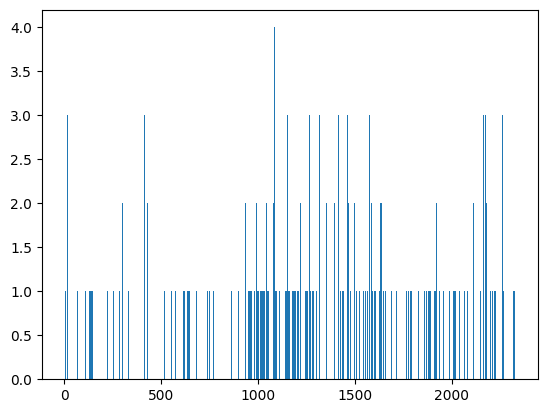

In [ ]:
print("Misclassified images from all 4 classifiers: ", len([1 for misclassification in misclassifications if misclassification == 4]))
print("Misclassified images from 3 classifiers: ", len([1 for misclassification in misclassifications if misclassification == 3]))
print("Misclassified images from 2 classifiers: ", len([1 for misclassification in misclassifications if misclassification == 2]))
print("Misclassified images from 1 classifiers: ", len([1 for misclassification in misclassifications if misclassification == 1]))
plt.bar(range(len(labels)),misclassifications)
plt.show()     

In [ ]:
misclassifications_classifier = []
for i in range(len(labels)):
  if labels[i].count(labels[i][0]) == len(labels[i]): # if all classifiers are good ad recognizing the image
    misclassifications_classifier.append([]) 
    continue
  wrong_classifiers = [index for index, predicted_class in enumerate(labels[i]) if predicted_class != labels[i][0]]
  misclassifications_classifier.append(wrong_classifiers) 

In [ ]:
print("Images that are misclassified by all classifiers: ", len([1 for misclassification in misclassifications_classifier if len(misclassification) == 4]))
print("--------")
print("Images that are misclassified only by VGG16: ", len([1 for misclassification in misclassifications_classifier 
                                                                 if len(misclassification) == 1 and 1 in misclassification]))
print("Images that are correctly classified only by VGG16: ", len([1 for misclassification in misclassifications_classifier 
                                                                 if len(misclassification) == 3 and 1 not in misclassification]))
print("--------")
print("Images that are misclassified only by ResNet50v2: ", len([1 for misclassification in misclassifications_classifier 
                                                                 if len(misclassification) == 1 and 2 in misclassification]))
print("Images that are correctly classified only by ResNet50v2: ", len([1 for misclassification in misclassifications_classifier 
                                                                 if len(misclassification) == 3 and 2 not in misclassification]))
print("--------")
print("Images that are misclassified only by MobileNetv2: ", len([1 for misclassification in misclassifications_classifier 
                                                                 if len(misclassification) == 1 and 3 in misclassification]))
print("Images that are correctly classified only by MobileNetv2: ", len([1 for misclassification in misclassifications_classifier 
                                                                 if len(misclassification) == 3 and 3 not in misclassification]))
print("--------")
print("Images that are misclassified only by CNN from scratch: ", len([1 for misclassification in misclassifications_classifier 
                                                                 if len(misclassification) == 1 and 4 in misclassification]))
print("Images that are correctly classified only by CNN from scratch: ", len([1 for misclassification in misclassifications_classifier 
                                                                 if len(misclassification) == 3 and 4 not in misclassification]))

Images that are misclassified by all classifiers:  18
--------
Images that are misclassified only by VGG16:  32
Images that are correctly classified only by VGG16:  9
--------
Images that are misclassified only by ResNet50v2:  9
Images that are correctly classified only by ResNet50v2:  24
--------
Images that are misclassified only by MobileNetv2:  37
Images that are correctly classified only by MobileNetv2:  10
--------
Images that are misclassified only by CNN from scratch:  506
Images that are correctly classified only by CNN from scratch:  10


In [ ]:
images =  tf.concat([data_batch for data_batch, labels_batch in test_dataset], axis = 0)

In [ ]:
labels =  tf.concat([labels_batch for data_batch, labels_batch in test_dataset], axis = 0)

In [ ]:
print(labels[2206])

tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0.], shape=(8,), dtype=float32)


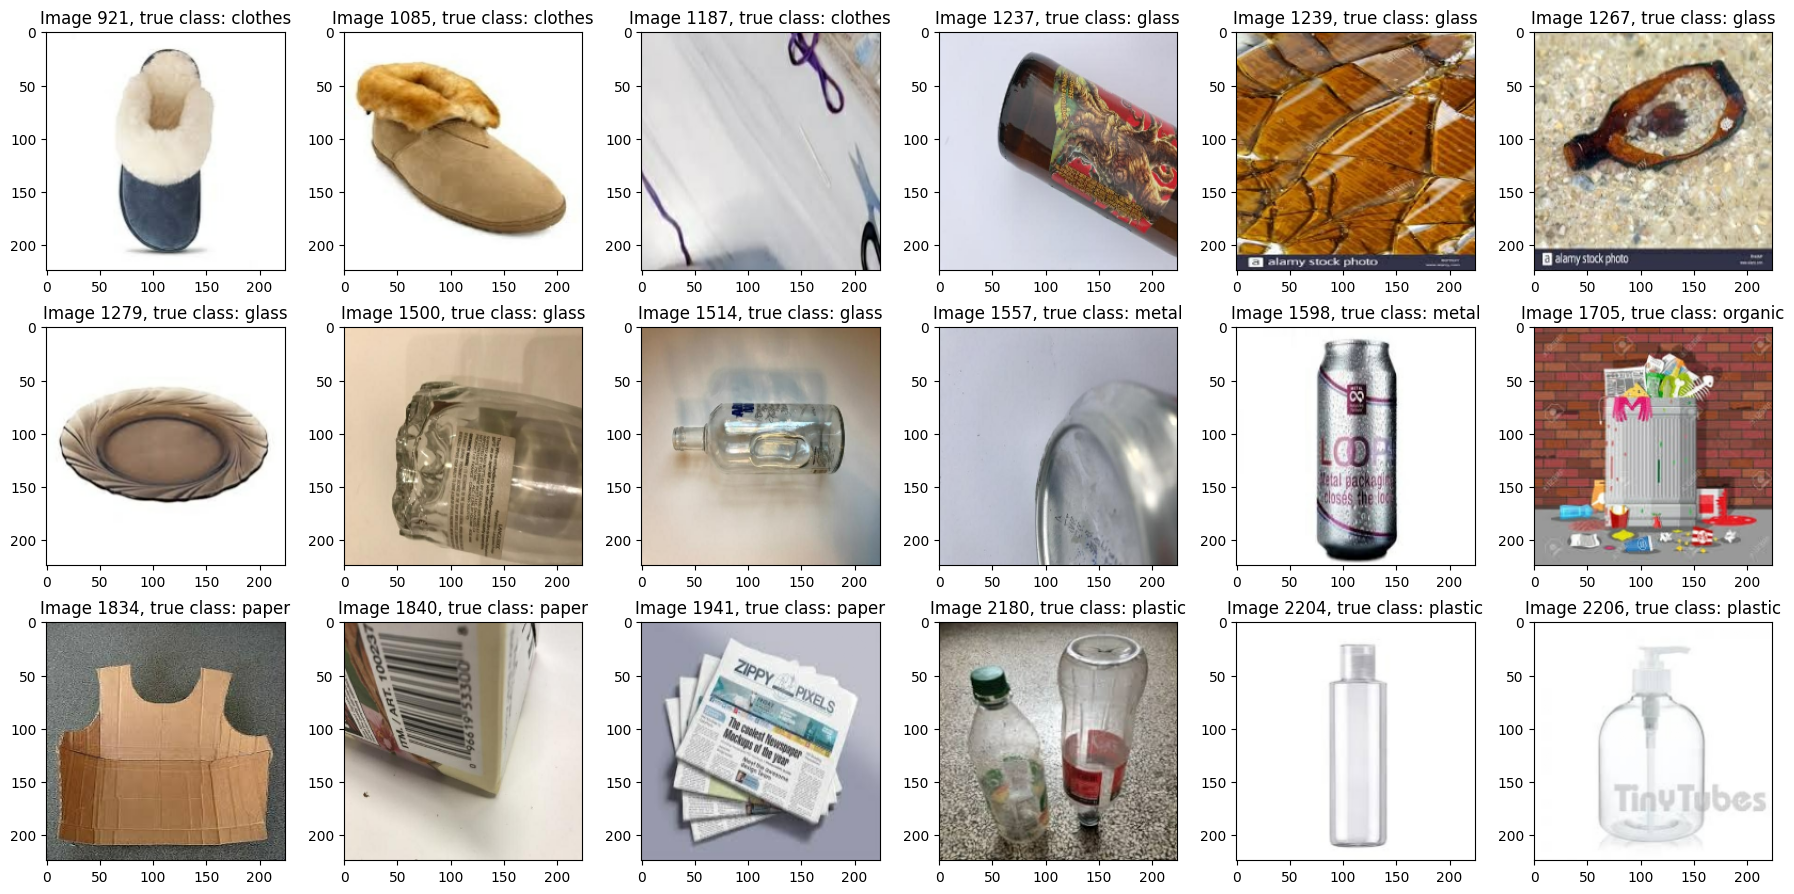

In [ ]:
total_misclassification_indexes = [i for i in range(len(misclassifications_classifier)) if len(misclassifications_classifier[i]) == 4]
plot_images(images, labels, total_misclassification_indexes)